In [3]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission.csv to sample_submission (2).csv


In [4]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (1).csv


In [5]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (2).csv


In [6]:
# import packages
import os
import joblib
import numpy as np
import pandas as pd
import warnings

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

In [7]:
# setting up options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [8]:
#load the dataset

train_df = pd.read_csv('train (2).csv')
test_df = pd.read_csv('test (1).csv')
submission = pd.read_csv('sample_submission (2).csv')

In [9]:
#train dataset
train_df.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
0,0,0,0,6,1,0,0,0,0,7,0,0,0,3,0,1,0,0,3,3,1,0,2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,11,0,0,0,0,0,9,0,0,0,0,0,0,3,0,1,3,0,0,0,0,0,0,0,1,1,0,0,3,0,0,0,0,0,0,2,0,0,Class_6
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,Class_6
2,2,0,0,0,0,0,1,0,3,0,0,1,0,0,0,0,0,0,0,0,5,4,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,5,0,5,0,1,0,0,0,1,0,0,1,0,7,0,1,1,0,3,4,0,0,1,3,0,2,0,0,8,0,0,0,0,1,0,0,0,0,Class_2
3,3,0,0,7,0,1,5,2,2,0,1,2,0,5,0,0,4,0,0,22,2,1,0,0,0,0,3,0,37,0,1,3,13,0,10,0,3,1,1,0,7,0,0,2,0,1,0,0,0,0,0,0,10,0,0,25,1,0,1,2,0,2,0,7,0,0,0,0,4,0,2,2,0,4,3,0,Class_8
4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_2


In [10]:
#dimensions and missing values in train dataset
print(f'Number of rows: {train_df.shape[0]};  Number of columns: {train_df.shape[1]}; No of missing values: {sum(train_df.isna().sum())}')

Number of rows: 200000;  Number of columns: 77; No of missing values: 0


In [11]:
#data types
train_df.dtypes

id             int64
feature_0      int64
feature_1      int64
feature_2      int64
feature_3      int64
feature_4      int64
feature_5      int64
feature_6      int64
feature_7      int64
feature_8      int64
feature_9      int64
feature_10     int64
feature_11     int64
feature_12     int64
feature_13     int64
feature_14     int64
feature_15     int64
feature_16     int64
feature_17     int64
feature_18     int64
feature_19     int64
feature_20     int64
feature_21     int64
feature_22     int64
feature_23     int64
feature_24     int64
feature_25     int64
feature_26     int64
feature_27     int64
feature_28     int64
feature_29     int64
feature_30     int64
feature_31     int64
feature_32     int64
feature_33     int64
feature_34     int64
feature_35     int64
feature_36     int64
feature_37     int64
feature_38     int64
feature_39     int64
feature_40     int64
feature_41     int64
feature_42     int64
feature_43     int64
feature_44     int64
feature_45     int64
feature_46   

In [12]:
#id and feature columns
train_df.describe()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000
mean,99999.500000,0.972710,1.168365,2.219325,2.296735,0.793530,1.431105,1.010695,0.673090,1.94398,1.719655,1.422550,0.980955,2.444760,1.078085,1.406445,1.413200,1.389720,0.317740,1.656610,6.186895,1.438510,1.031415,1.465935,0.572000,1.061165,2.348775,0.774490,0.789325,2.326190,1.581820,0.598825,1.856545,1.516105,1.556650,0.681135,1.162070,0.665375,1.500505,1.276080,2.332940,1.255005,1.159385,0.834600,4.472965,0.890300,0.690865,2.413920,0.969055,1.527270,0.479560,2.275075,1.617085,0.622570,1.354225,6.008040,2.493365,2.118190,0.566695,0.927100,1.343715,1.666660,1.287270,2.764225,1.455190,0.696915,1.798040,0.508695,1.827300,0.910370,1.603585,1.219210,0.806895,1.282925,2.94021,0.632005
std,57735.171256,3.941836,3.993407,6.476570,7.551858,2.935785,5.162746,3.949231,2.234949,3.93133,5.916988,3.288376,3.837771,3.421765,3.713650,2.868740,8.240441,3.056888,1.052619,2.557042,13.982531,2.666167,2.931762,6.734983,1.676326,5.718083,7.319992,1.752804,3.517043,8.402752,5.565404,1.418070,3.898896,7.782723,3.913513,2.307127,3.443417,2.637001,2.900480,4.268174,4.523171,4.482382,5.407836,3.496194,7.723795,2.150593,2.188692,9.774465,5.845938,4.375537,2.056233,5.227827,5.149637,1.953864,2.960980,11.286352,8.787684,4.107152,2.023164,2.697104,6.168400,6.387178,5.480586,8.251200,7.121127,2.185252,5.053014,1.867330,7.188924,3.835182,4.877679,4.826003,2.458741,4.261420,10.78465,3.925310
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,49999.750000,0.000000,0.000000,0.000000

In [13]:
#target columns
print('Target column basic statistics:')
train_df['target'].describe()

Target column basic statistics:


count      200000
unique          9
top       Class_6
freq        51811
Name: target, dtype: object

In [14]:
print('Frequency of each target classes:')
train_df['target'].value_counts()

Frequency of each target classes:


Class_6    51811
Class_8    51763
Class_9    25542
Class_2    24431
Class_3    14798
Class_7    14769
Class_1     9118
Class_4     4704
Class_5     3064
Name: target, dtype: int64

#Test dataset
Test dataset is used to make a prediction based on the model that has previously trained. Exploration in this dataset is also needed to see how the data is structured and especially on it’s similiarity with the train dataset.

In [15]:
test_df.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,200000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,200001,1,2,0,0,0,0,0,0,0,0,1,0,2,2,0,0,1,0,0,0,2,0,0,1,0,3,0,1,0,0,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,3,2,0,0,0,0,0,0,1,7,0,1,3,1,3,0,0,0,0,3,0,0
2,200002,0,1,7,1,0,0,0,0,6,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,2,0,0,4,0,0,0,0,0,0,0,0,1,0,0,4,0,0,1,0,0,0,6,0,0,2,10,0,0,0,2,1,0,0,0,0,0,3,0,0,0,0,3,0,2,0,0
3,200003,0,0,0,4,3,1,0,0,0,0,7,0,0,0,7,0,0,0,5,0,1,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,7,5,0,0,0,0,0,0,0,0,0,2,3,0,0,0,1,0,0,0,0,0,4,0,0,0,1,0,0,0,4,0,0
4,200004,0,0,5,0,0,0,0,0,0,8,1,0,2,0,0,0,0,0,9,1,0,0,0,0,0,0,0,0,3,0,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,2,1,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [16]:
print(f'Number of rows: {test_df.shape[0]};  Number of columns: {test_df.shape[1]}; No of missing values: {sum(test_df.isna().sum())}')

Number of rows: 100000;  Number of columns: 76; No of missing values: 0


In [17]:
test_df.dtypes

id            int64
feature_0     int64
feature_1     int64
feature_2     int64
feature_3     int64
feature_4     int64
feature_5     int64
feature_6     int64
feature_7     int64
feature_8     int64
feature_9     int64
feature_10    int64
feature_11    int64
feature_12    int64
feature_13    int64
feature_14    int64
feature_15    int64
feature_16    int64
feature_17    int64
feature_18    int64
feature_19    int64
feature_20    int64
feature_21    int64
feature_22    int64
feature_23    int64
feature_24    int64
feature_25    int64
feature_26    int64
feature_27    int64
feature_28    int64
feature_29    int64
feature_30    int64
feature_31    int64
feature_32    int64
feature_33    int64
feature_34    int64
feature_35    int64
feature_36    int64
feature_37    int64
feature_38    int64
feature_39    int64
feature_40    int64
feature_41    int64
feature_42    int64
feature_43    int64
feature_44    int64
feature_45    int64
feature_46    int64
feature_47    int64
feature_48    int64


In [18]:
test_df.describe()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000
mean,249999.500000,0.99051,1.168520,2.182730,2.316240,0.792050,1.435520,1.016930,0.679780,1.945370,1.716100,1.392320,1.004740,2.433260,1.061720,1.409220,1.359410,1.385640,0.315960,1.656700,6.258360,1.44348,1.029740,1.429920,0.57528,1.063300,2.366270,0.777330,0.78862,2.270520,1.570310,0.595990,1.855500,1.534080,1.577660,0.691960,1.165710,0.67222,1.517700,1.277600,2.298310,1.270210,1.13958,0.830240,4.512870,0.893290,0.677300,2.403370,0.978220,1.507760,0.466210,2.26074,1.62295,0.614610,1.332240,6.017970,2.469710,2.129070,0.567190,0.918490,1.341170,1.644870,1.284640,2.740550,1.457280,0.700040,1.797590,0.50930,1.793660,0.909660,1.616010,1.201490,0.798630,1.313360,2.93515,0.64209
std,28867.657797,4.01893,4.030234,6.402817,7.584742,2.938386,5.164174,3.956569,2.262651,3.938406,5.876687,3.194114,3.915981,3.419176,3.669671,2.875413,8.002172,3.038772,1.032095,2.550535,14.230285,2.69081,2.938303,6.688267,1.68714,5.696616,7.362339,1.748136,3.48654,8.288223,5.597365,1.388397,3.874141,7.885321,3.980732,2.304119,3.445697,2.65910,2.930036,4.296296,4.443145,4.581782,5.32028,3.475411,7.846887,2.189349,2.134598,9.823958,5.950355,4.350373,2.007346,5.17950,5.21433,1.944722,2.888467,11.391307,8.731884,4.138896,2.050543,2.657897,6.216216,6.265474,5.466053,8.141103,7.160207,2.174394,5.075318,1.87308,7.071364,3.797739,4.944454,4.784381,2.427921,4.443859,10.78833,3.98134
min,200000.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,224999.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [19]:
submission.head()

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,200000,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
1,200001,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
2,200002,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
3,200003,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
4,200004,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111


In [20]:
features = [feature for feature in train_df.columns if feature not in ['id', 'target']]
unique_values_train = np.zeros(2)
for feature in features:
    temp = train_df[feature].unique()
    unique_values_train = np.concatenate([unique_values_train, temp])
unique_values_train = np.unique(unique_values_train)

unique_values_test = np.zeros(2)
for feature in features:
    temp = test_df[feature].unique()
    unique_values_test = np.concatenate([unique_values_test, temp])
unique_values_test = np.unique(unique_values_test)

unique_value_feature_train = pd.DataFrame(train_df[features].nunique())
unique_value_feature_train = unique_value_feature_train.reset_index(drop=False)
unique_value_feature_train.columns = ['Features', 'Count']
unique_value_feature_test = pd.DataFrame(test_df[features].nunique())
unique_value_feature_test = unique_value_feature_test.reset_index(drop=False)
unique_value_feature_test.columns = ['Features', 'Count']

unique_value_feature_diff = unique_value_feature_train.copy()
unique_value_feature_diff['Count'] = unique_value_feature_train['Count'] - unique_value_feature_test['Count']
unique_value_feature_diff = unique_value_feature_diff[unique_value_feature_diff['Count']!=0]

transpose_features_train = train_df[features]
transpose_features_train = transpose_features_train.apply(pd.Series.value_counts, axis=1).fillna(0)
transpose_features_test = test_df[features]
transpose_features_test = transpose_features_test.apply(pd.Series.value_counts, axis=1).fillna(0)

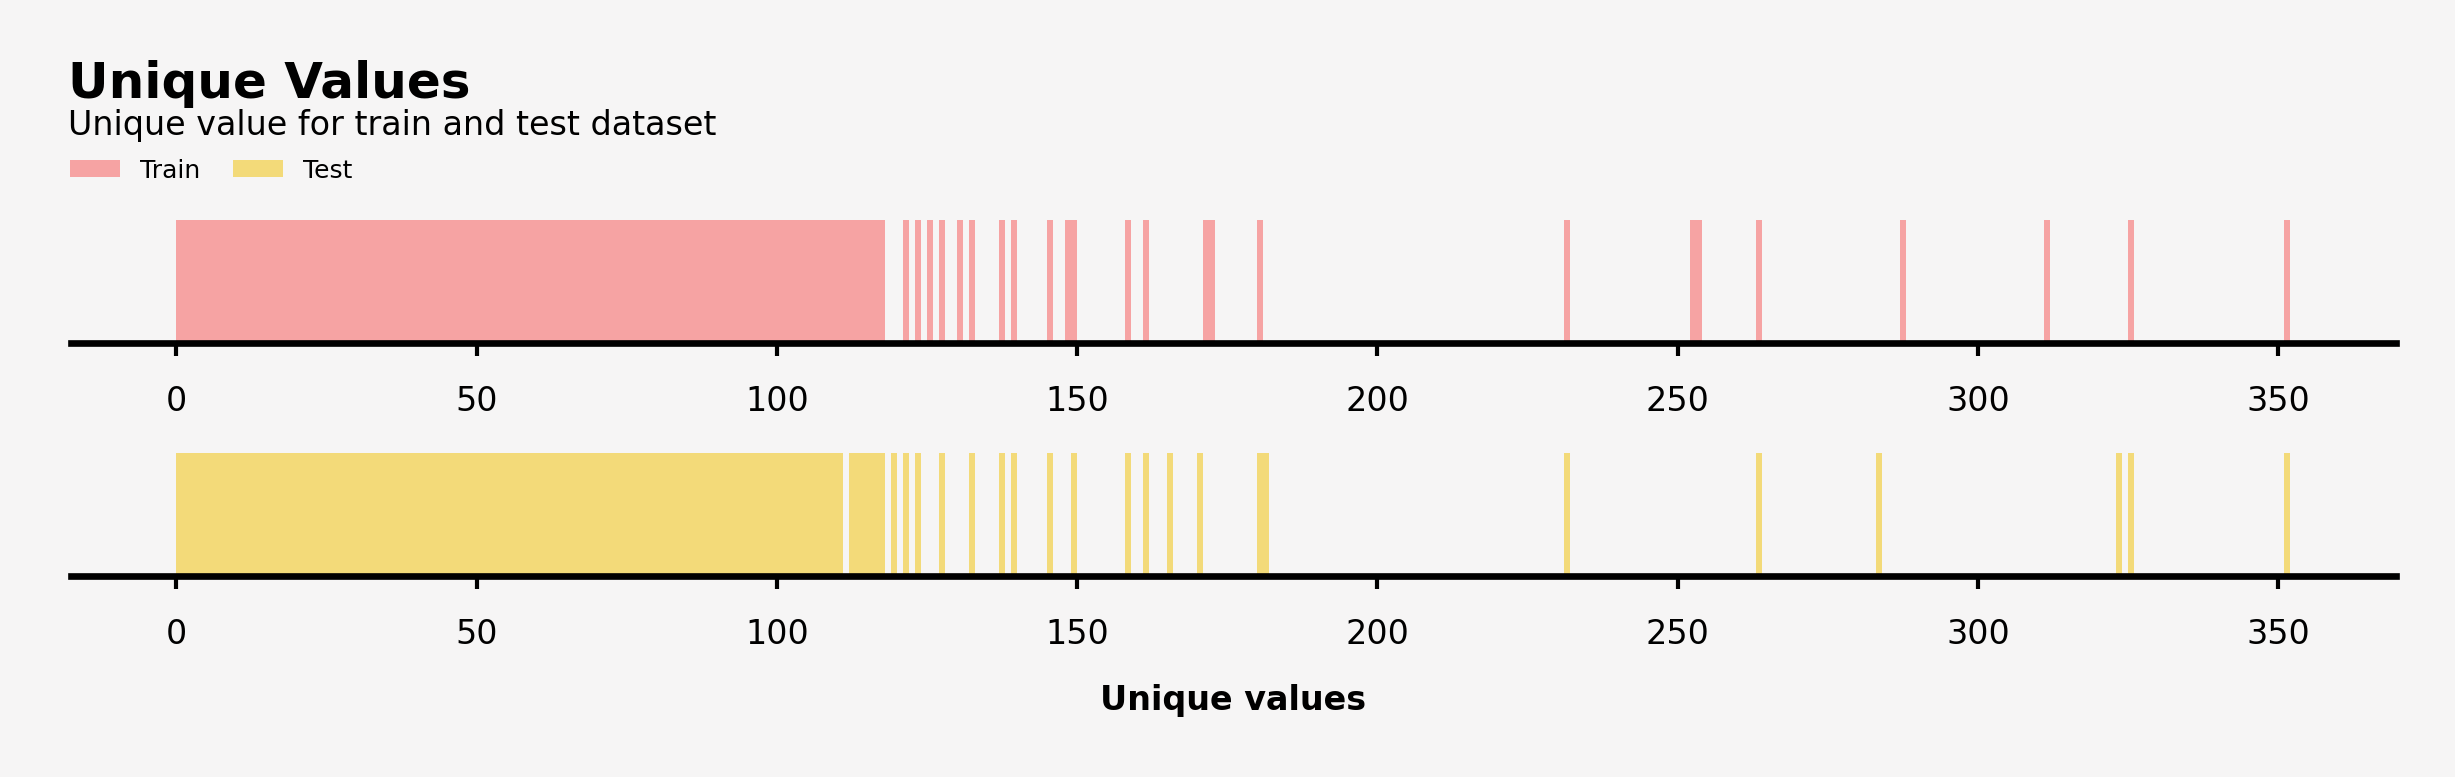

In [21]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 0.8), facecolor='#f6f5f5')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.4, hspace=0.8)

background_color = "#f6f5f5"
color_map = ['#F78888', 'lightgray']
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top", "left"]:
    ax0.spines[s].set_visible(False)
ax0.set_facecolor(background_color)
ax0.tick_params(axis = "y", which = "both", left = False)
ax0_sns = sns.histplot(ax=ax0, x=unique_values_train, zorder=2, bins=352, linewidth=0)
ax0_sns.set_xlabel("Unique values",fontsize=4, weight='bold')
ax0_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax0_sns.get_yaxis().set_visible(False)
ax0.text(-18, 2.3, 'Unique Values', fontsize=6, ha='left', va='top', weight='bold')
ax0.text(-18, 1.9, 'Unique value for train and test dataset', fontsize=4, ha='left', va='top')
ax0_sns.legend(['Train', 'Test'], ncol=2, facecolor=background_color, edgecolor=background_color, fontsize=3, bbox_to_anchor=(-0.01, 1.6), loc='upper left')

color_map = ['#F3D250', 'lightgray']
sns.set_palette(sns.color_palette(color_map))

ax1 = fig.add_subplot(gs[1, 0])
for s in ["right", "top", "left"]:
    ax1.spines[s].set_visible(False)
ax1.set_facecolor(background_color)
ax1.tick_params(axis = "y", which = "both", left = False)
ax1_sns = sns.histplot(ax=ax1, x=unique_values_test, zorder=2, bins=352, linewidth=0)
ax1_sns.set_xlabel("Unique values",fontsize=4, weight='bold')
ax1_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax1_sns.get_yaxis().set_visible(False)
ax1_sns.legend(['Test'], ncol=2, facecolor=background_color, edgecolor=background_color, fontsize=3, bbox_to_anchor=(0.06, 3.4), loc='upper left')

plt.show()

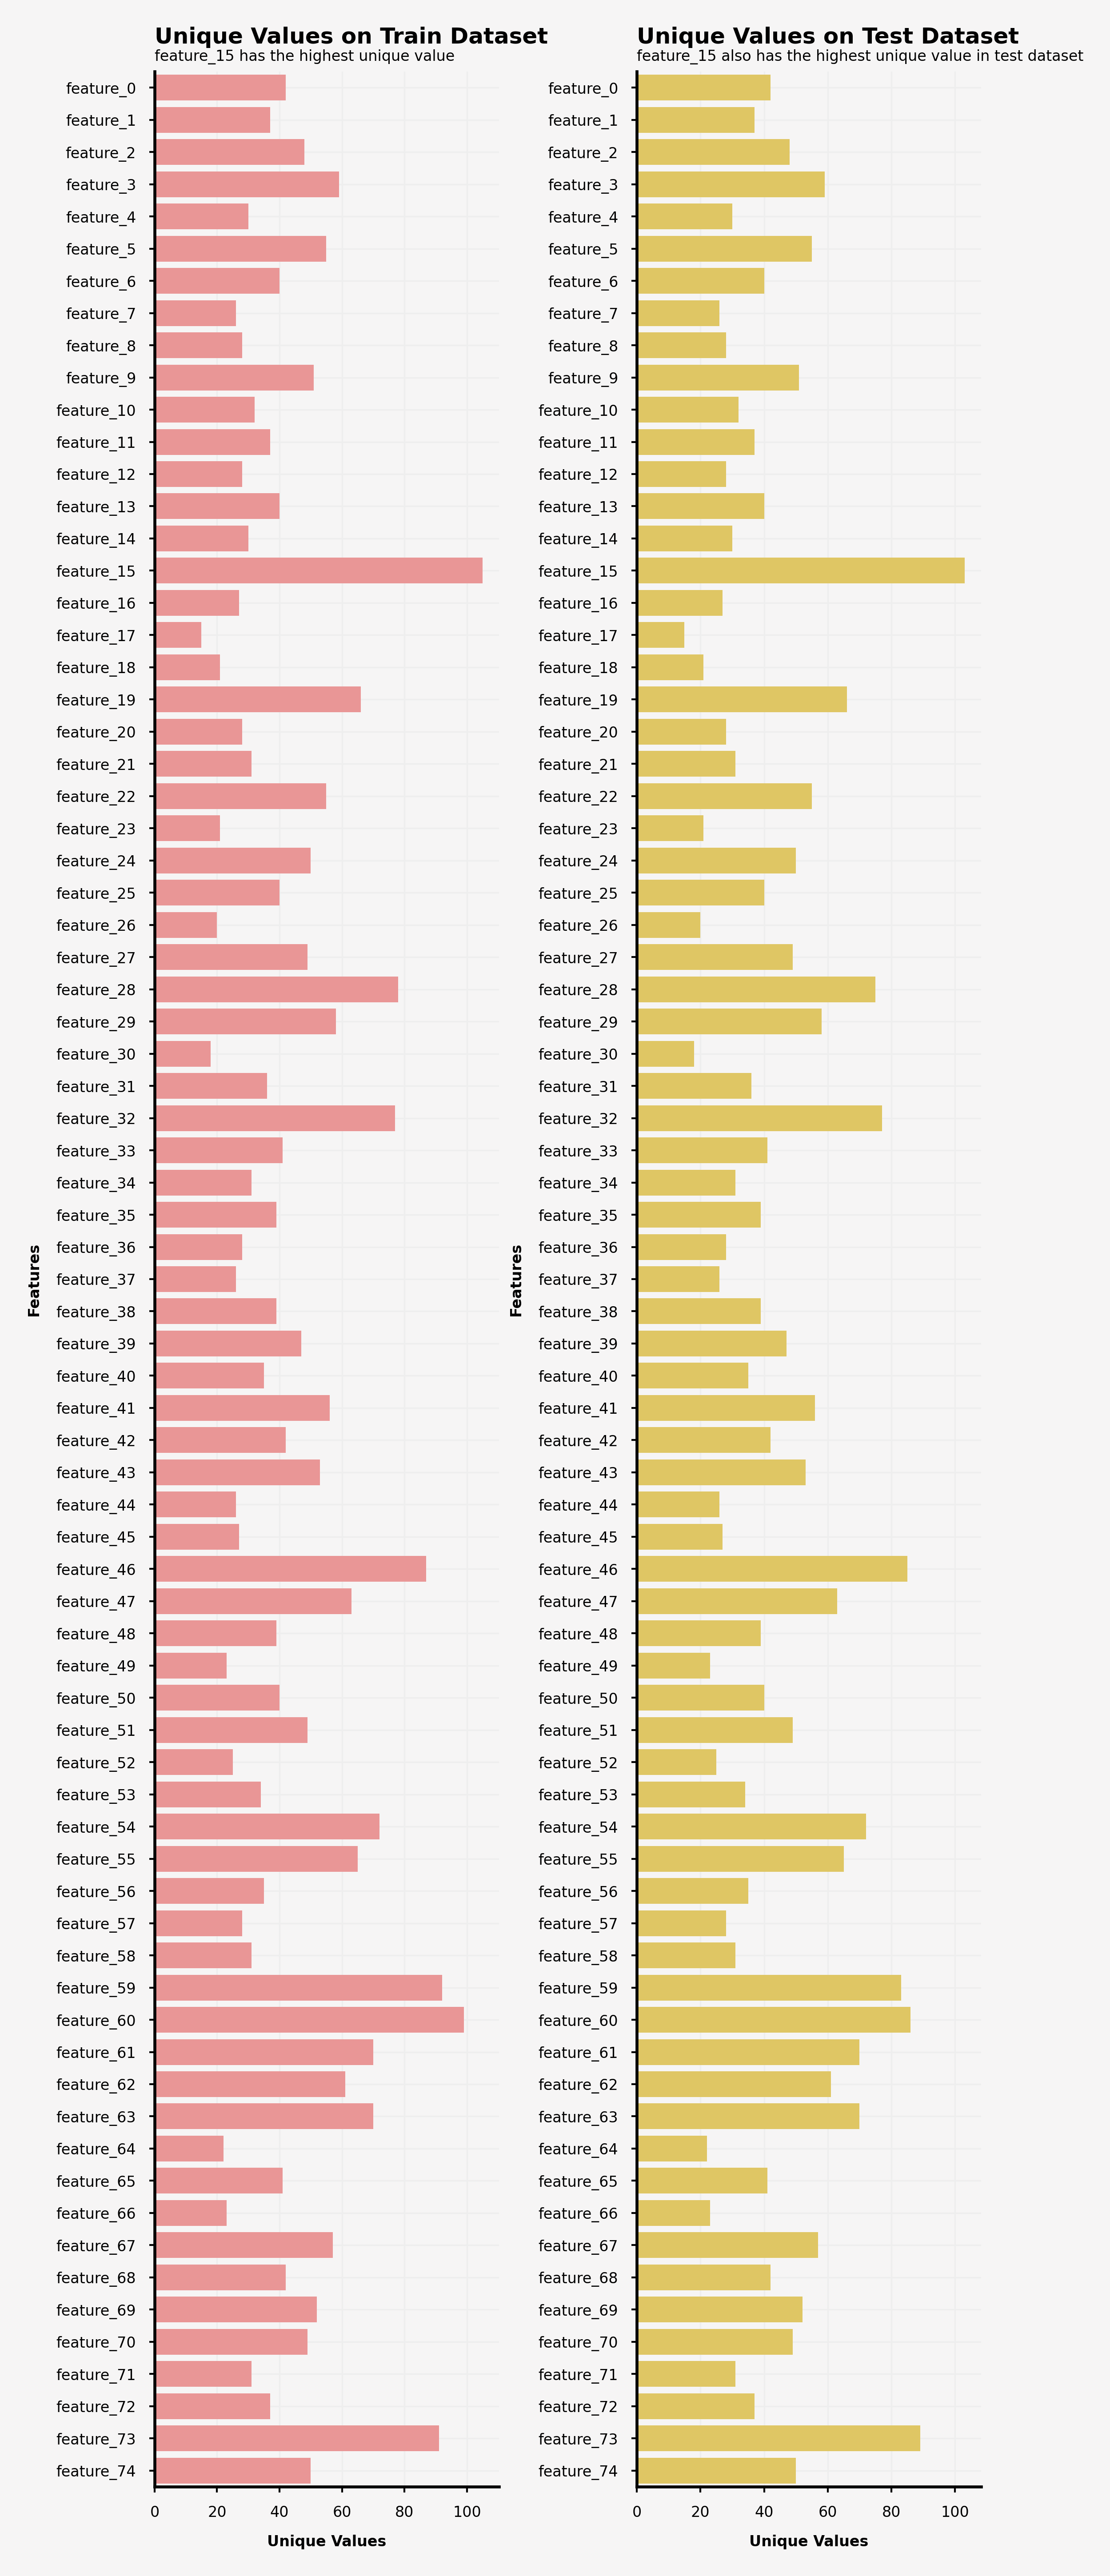

In [22]:
# Individual features
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(4, 12), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.4, hspace=0.1)

background_color = "#f6f5f5"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.set_facecolor(background_color)
ax0_sns = sns.barplot(ax=ax0, y=unique_value_feature_train['Features'], x=unique_value_feature_train['Count'], zorder=2, linewidth=0, orient='h', color='#F78888')
ax0_sns.set_xlabel("Unique Values",fontsize=4, weight='bold')
ax0_sns.set_ylabel("Features",fontsize=4, weight='bold')
ax0_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.text(0, -1.9, 'Unique Values on Train Dataset', fontsize=6, ha='left', va='top', weight='bold')
ax0.text(0, -1.2, 'feature_15 has the highest unique value', fontsize=4, ha='left', va='top')
ax1 = fig.add_subplot(gs[0, 1])
for s in ["right", "top"]:
    ax1.spines[s].set_visible(False)
ax1.set_facecolor(background_color)
ax1_sns = sns.barplot(ax=ax1, y=unique_value_feature_test['Features'], x=unique_value_feature_test['Count'], zorder=2, linewidth=0, orient='h', color='#F3D250')
ax1_sns.set_xlabel("Unique Values",fontsize=4, weight='bold')
ax1_sns.set_ylabel("Features",fontsize=4, weight='bold')
ax1_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax1_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax1_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax1.text(0, -1.9, 'Unique Values on Test Dataset', fontsize=6, ha='left', va='top', weight='bold')
ax1.text(0, -1.2, 'feature_15 also has the highest unique value in test dataset', fontsize=4, ha='left', va='top')

plt.show()

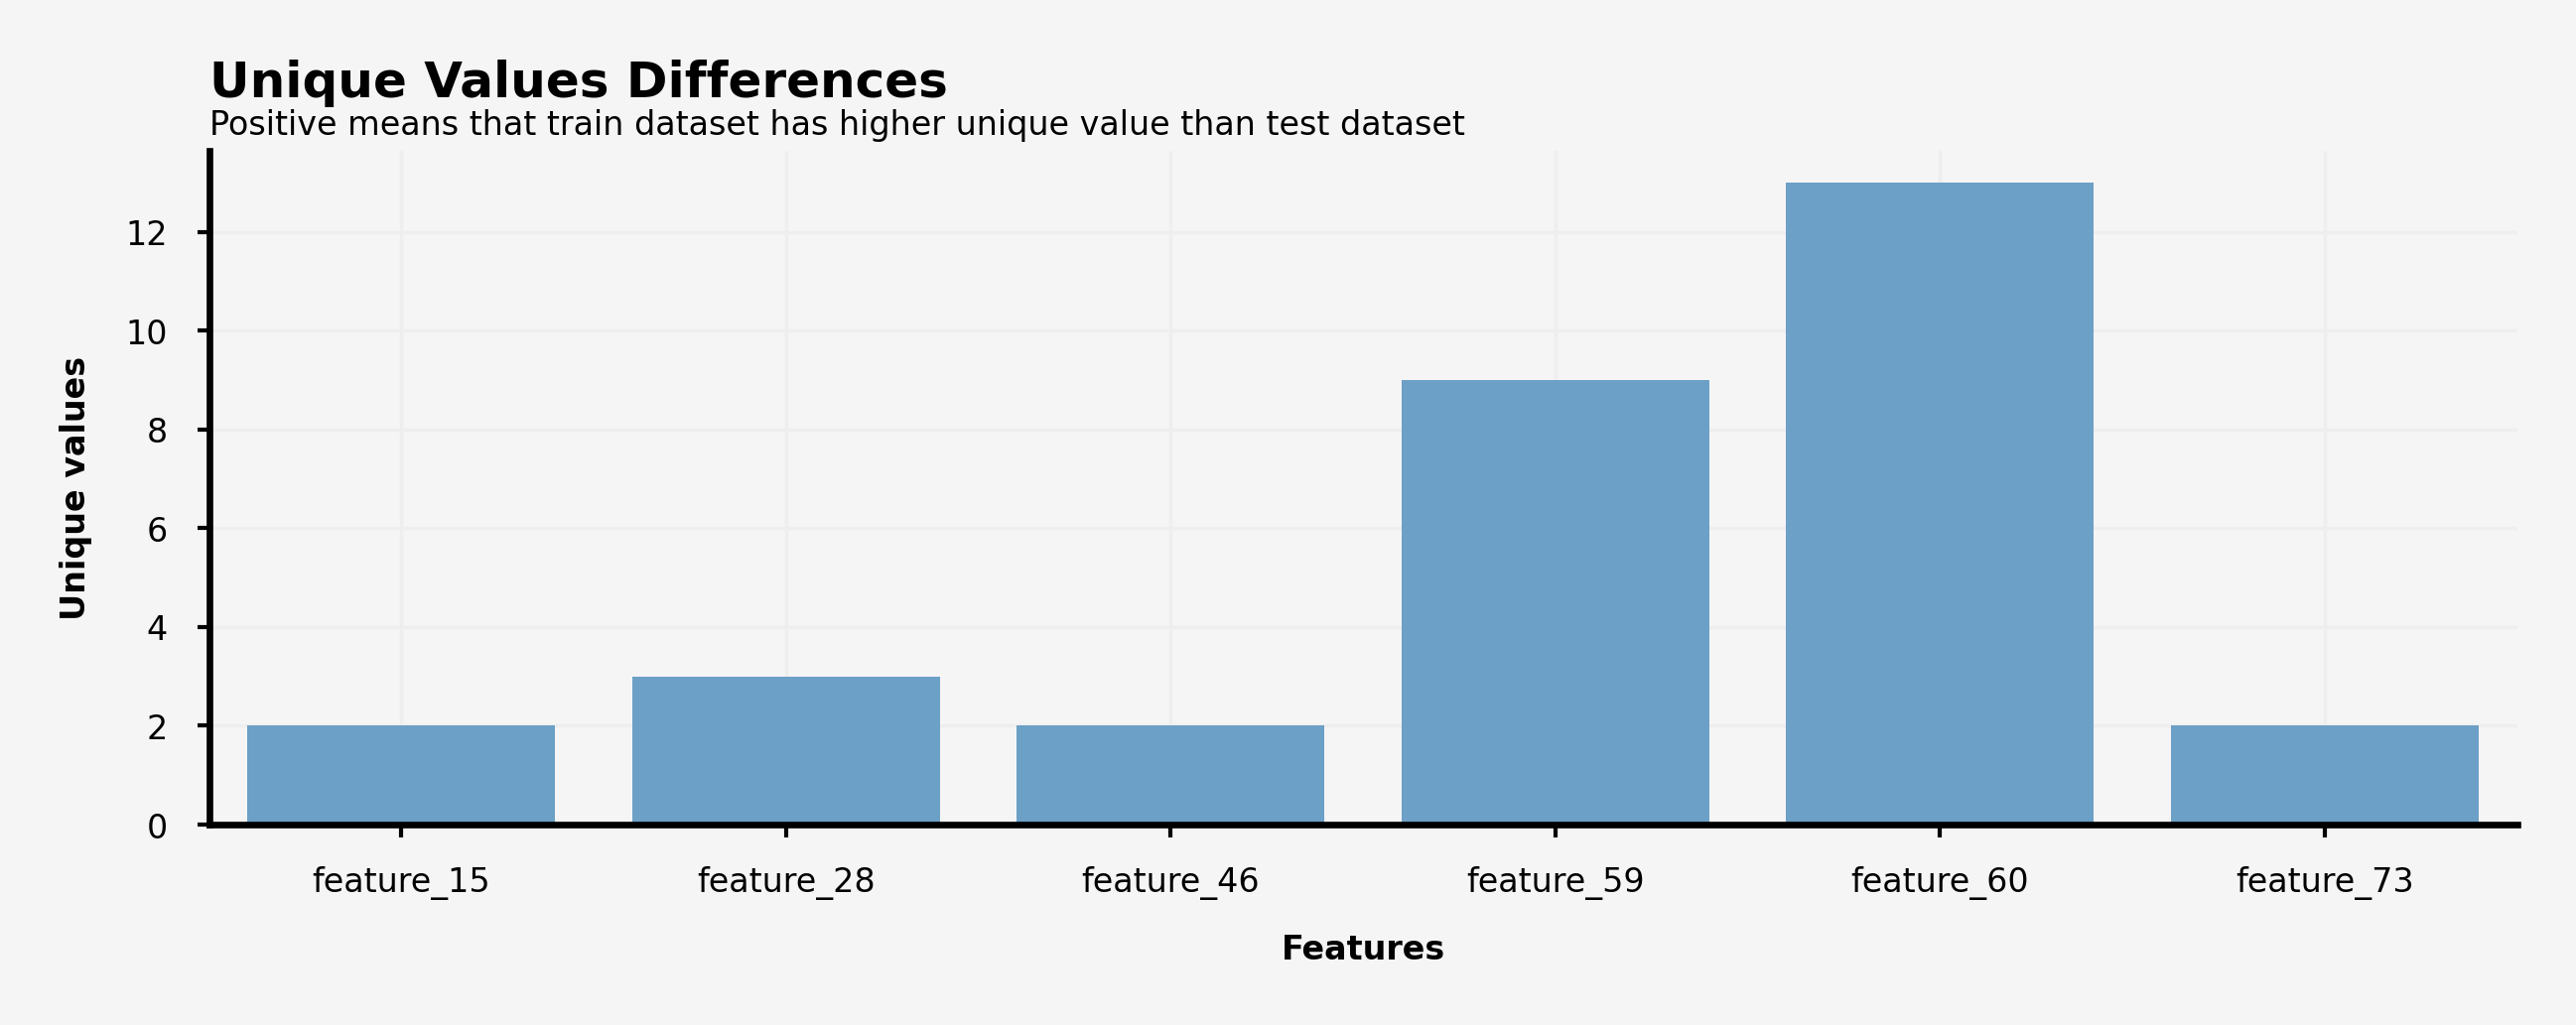

In [23]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 1.5), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.4, hspace=0.1)

ax = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax.spines[s].set_visible(False)
ax.set_facecolor(background_color)
ax_sns = sns.barplot(ax=ax, x=unique_value_feature_diff['Features'], 
                      y=unique_value_feature_diff['Count'], 
                      zorder=2, linewidth=0, color='#5DA2D5')
ax_sns.set_xlabel("Features",fontsize=4, weight='bold')
ax_sns.set_ylabel("Unique values",fontsize=4, weight='bold')
ax_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax.text(-0.5, 15.5, 'Unique Values Differences', fontsize=6, ha='left', va='top', weight='bold')
ax.text(-0.5, 14.5, 'Positive means that train dataset has higher unique value than test dataset', fontsize=4, ha='left', va='top')

plt.show()

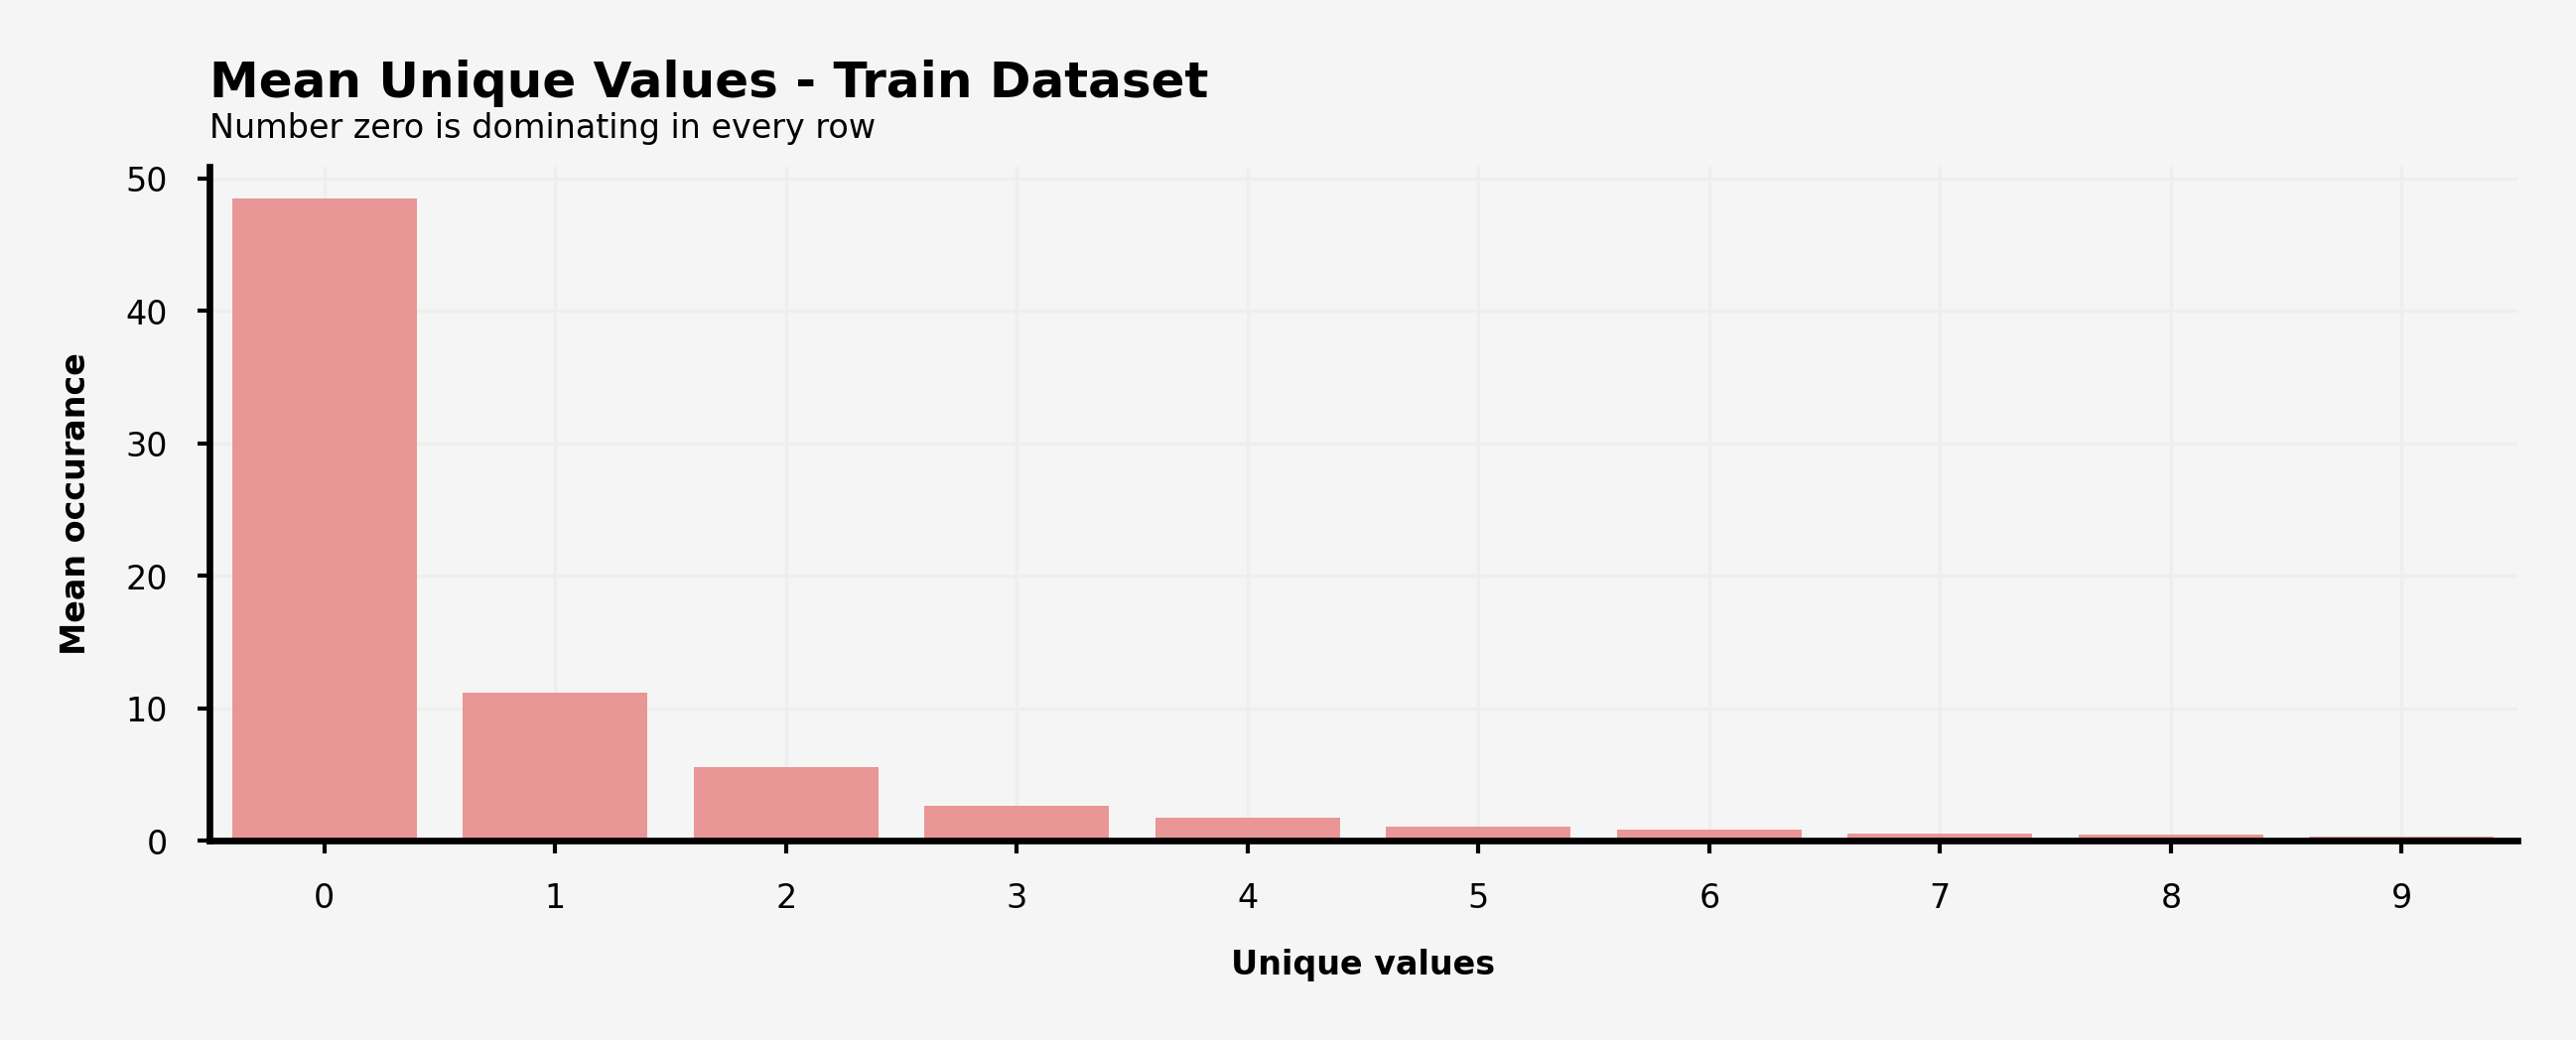

In [24]:
 #Individual Values
 mean_unique_value_train = pd.DataFrame(transpose_features_train.mean(axis=0))
mean_unique_value_train = mean_unique_value_train.reset_index(drop=False)
mean_unique_value_train.columns = ['Unique', 'Mean']
mean_unique_value_train = mean_unique_value_train.sort_values('Mean', ascending=False)[:10]
mean_unique_value_train
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 1.5), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.4, hspace=0.1)
ax = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax.spines[s].set_visible(False)
ax.set_facecolor(background_color)
ax_sns = sns.barplot(ax=ax, x=mean_unique_value_train['Unique'], 
                      y=mean_unique_value_train['Mean'], 
                      zorder=2, linewidth=0, color='#F78888')
ax_sns.set_xlabel("Unique values",fontsize=4, weight='bold')
ax_sns.set_ylabel("Mean occurance",fontsize=4, weight='bold')
ax_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax.text(-0.5, 59, 'Mean Unique Values - Train Dataset', fontsize=6, ha='left', va='top', weight='bold')
ax.text(-0.5, 55, 'Number zero is dominating in every row', fontsize=4, ha='left', va='top')
plt.show()

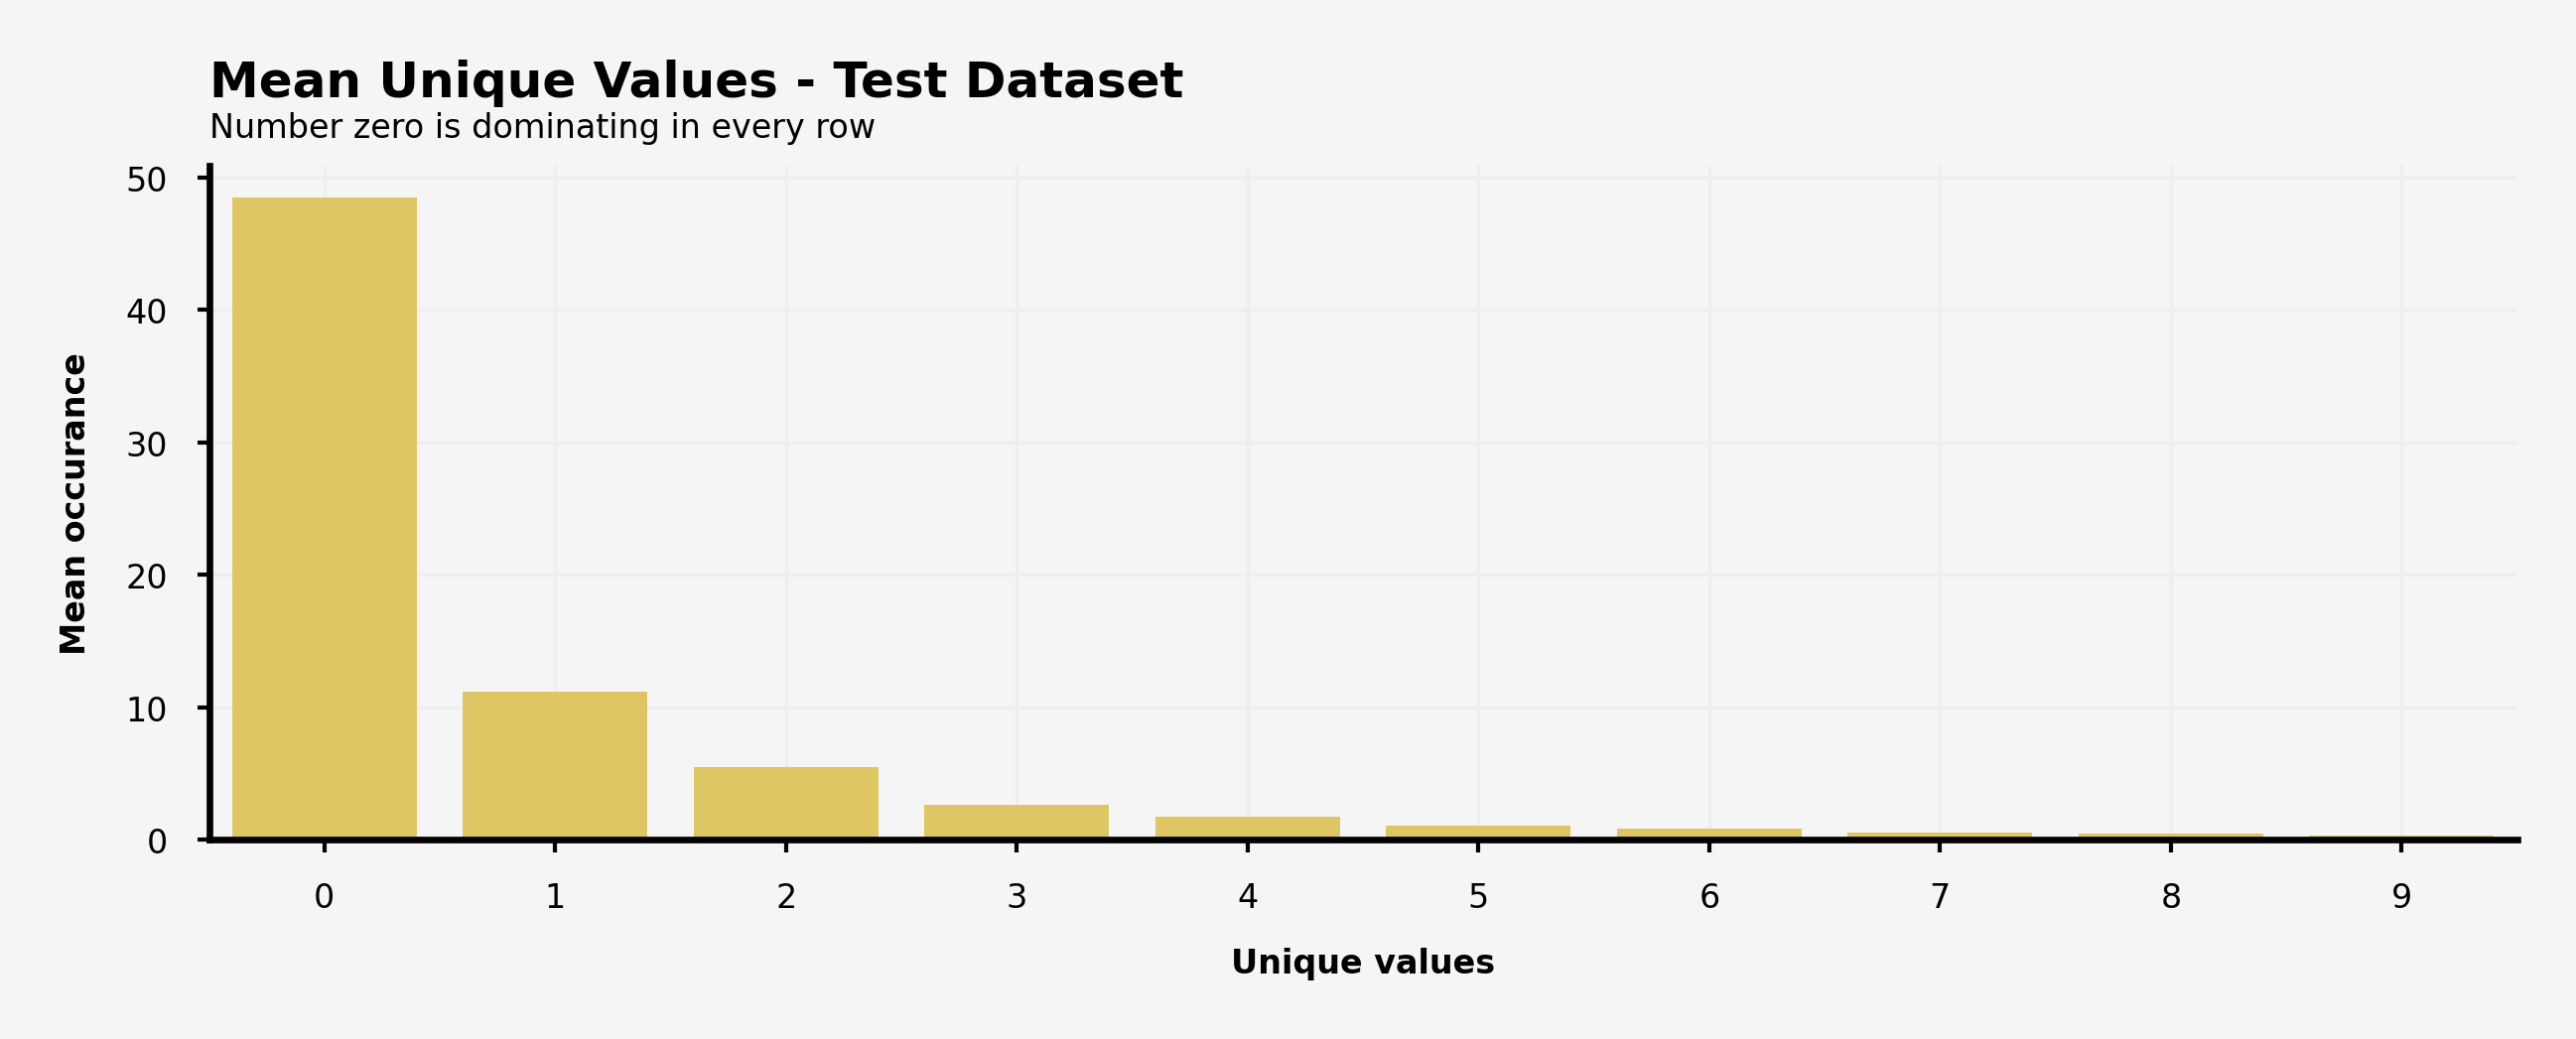

In [25]:
mean_unique_value_test = pd.DataFrame(transpose_features_test.mean(axis=0))
mean_unique_value_test = mean_unique_value_test.reset_index(drop=False)
mean_unique_value_test.columns = ['Unique', 'Mean']
mean_unique_value_test = mean_unique_value_test.sort_values('Mean', ascending=False)[:10]
mean_unique_value_test

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 1.5), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.4, hspace=0.1)
ax = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax.spines[s].set_visible(False)
ax.set_facecolor(background_color)
ax_sns = sns.barplot(ax=ax, x=mean_unique_value_test['Unique'], 
                      y=mean_unique_value_test['Mean'], 
                      zorder=2, linewidth=0, color='#F3D250')
ax_sns.set_xlabel("Unique values",fontsize=4, weight='bold')
ax_sns.set_ylabel("Mean occurance",fontsize=4, weight='bold')
ax_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax.text(-0.5, 59, 'Mean Unique Values - Test Dataset', fontsize=6, ha='left', va='top', weight='bold')
ax.text(-0.5, 55, 'Number zero is dominating in every row', fontsize=4, ha='left', va='top')

plt.show()